# Titanic Data Analysis

## Imports

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as ms
%matplotlib inline

## Read the Data

In [3]:
data = pd.read_csv('titanic.csv')

In [4]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
type(data)

pandas.core.frame.DataFrame

In [7]:
data.shape

(891, 12)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## Exploratory Data Analysis

### Visualizing the missing data

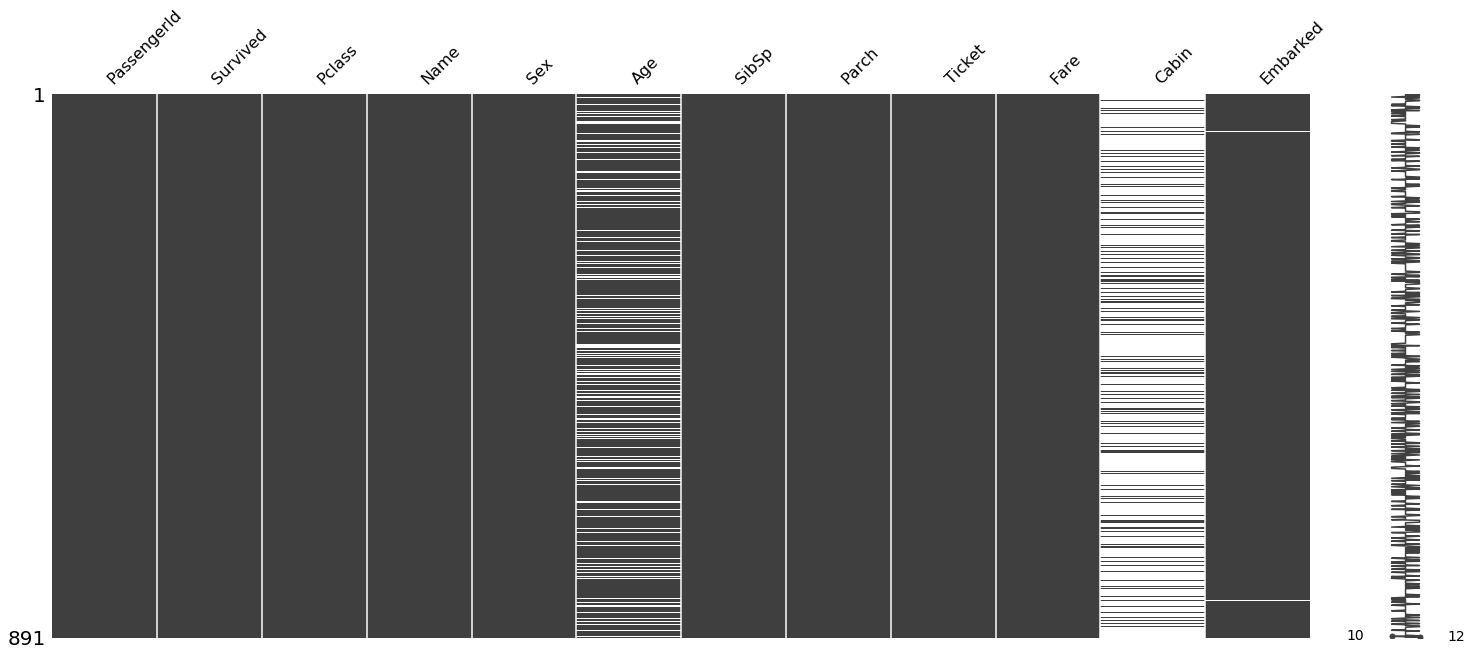

In [9]:
ms.matrix(data)

#### There are missing values in the columns for Age, Cabin and Embarked

#### Visualizing data with Seaborn

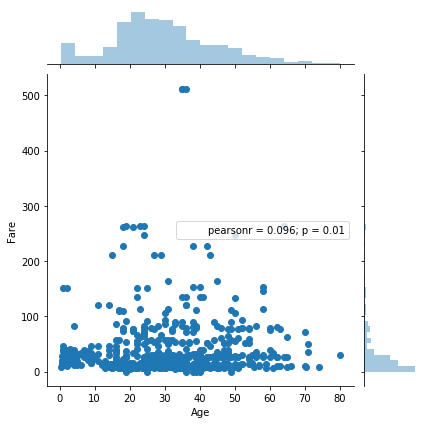

In [10]:
sns.jointplot(x='Age', y='Fare', data=data)

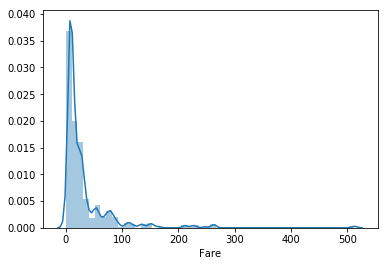

In [11]:
sns.distplot(data['Fare'])

Text(0.5,1,'Correlation Plot')

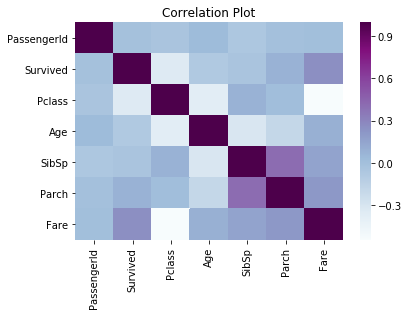

In [12]:
sns.heatmap(data.corr(),cmap='BuPu')
plt.title('Correlation Plot')

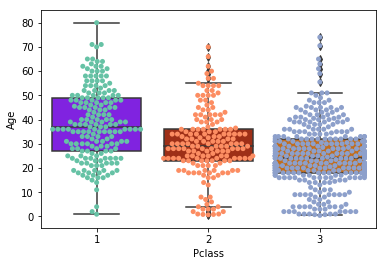

In [13]:
sns.boxplot(x='Pclass',y='Age',data=data, palette='gnuplot', linewidth=1.5)
sns.swarmplot(x="Pclass", y="Age", data=data, palette="Set2")

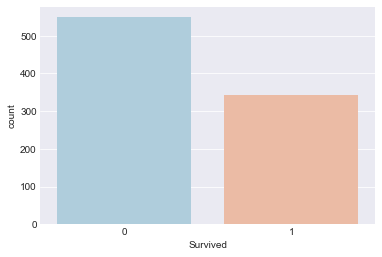

In [14]:
sns.set_style("darkgrid")
sns.countplot(x='Survived',data=data,palette='RdBu_r')

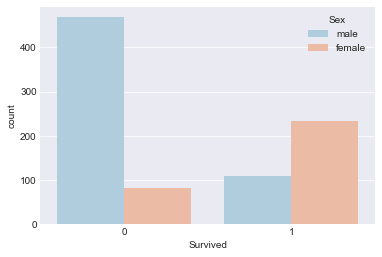

In [15]:
sns.set_style('darkgrid')
sns.countplot(x='Survived',hue='Sex', data=data, palette='RdBu_r')

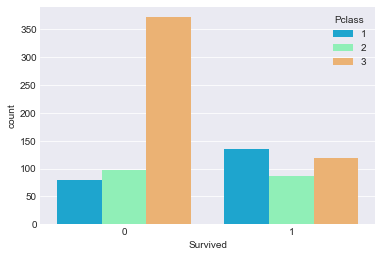

In [16]:
sns.set_style('darkgrid')
sns.countplot(x='Survived',hue='Pclass',data = data,palette='rainbow')

In [ ]:
data['Age'].hist(bins = 30, color = 'darkre', alpha = 0.8)